## 이진 분류 (Binary Classification)

### $ H(x) = f(Wx+b) $ 

$f$ 는 시그모이드 함수

## 시그모이드 함수 (Sigmoid function)
$ H(x)  = sigmoid(Wx+b) = \frac {1} {1+e^{-(Wx+b)}} = \sigma (Wx+b)$

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# 시그모이드 함수 정의

def sigmoid(x):
    return 1/(1+np.exp(-x))

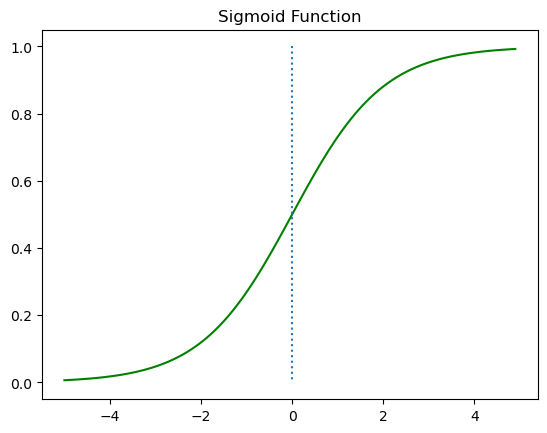

In [14]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y, 'g')
plt.plot([0,0], [1.0, 0.0], ':')
plt.title('Sigmoid Function')
plt.show()

## W 값의 변화에 따른 경사도의 변화

<function matplotlib.pyplot.show(close=None, block=None)>

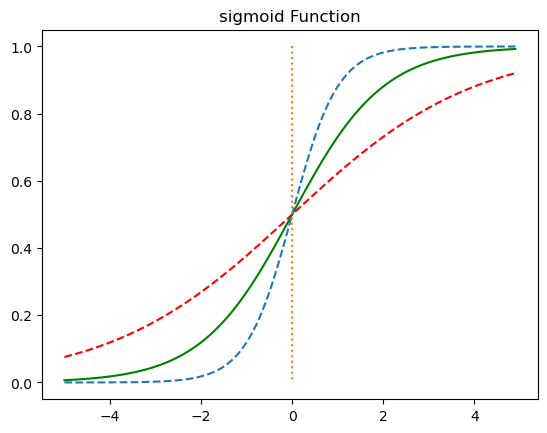

In [17]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(0.5*x)
y2 = sigmoid(x)
y3 = sigmoid(2*x)

plt.plot(x, y1, 'r', linestyle='--')
plt.plot(x, y2, 'g')
plt.plot(x, y3, linestyle='--')
plt.plot([0,0], [1.0,0.0], ':')
plt.title('sigmoid Function')
plt.show

### W 값이 클수록 경사도가 심해짐

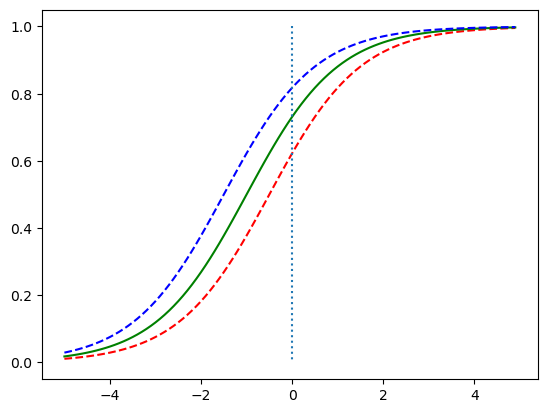

In [21]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x+0.5)
y2 = sigmoid(x+1)
y3 = sigmoid(x+1.5)

plt.plot(x, y1, 'r', linestyle='--')
plt.plot(x, y2, 'g')
plt.plot(x, y3, 'b', linestyle='--')
plt.plot([0,0], [1.0,0.0], ':')
plt.show()

### b의 값에 따라서 그래프가 좌, 우로 이동

## 2. 비용 함수(Cost Function)

$ cost(W) = -\frac {1}{n} \sum_{i=1}^{n} [y^i \log(H(x^i) + (1-y^i)\log(1-H(x^i))]$

In [22]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [23]:
torch.manual_seed(1)

In [24]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0,], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [25]:
print(x_train.size())
print(y_train.size())

torch.Size([6, 2])
torch.Size([6, 1])


In [26]:
W = torch.zeros((2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [28]:
h = 1 / (1 + torch.exp(-(x_train.matmul(W)+b)))
# h = torch.sigmoid(x_train.matmul(W) + b)

In [30]:
# 한 개의 원소에서만 오차 구해보기
-(y_train[0]*torch.log(h[0])
  +(1-y_train[0])*torch.log(1-h[0]))

tensor([0.6931], grad_fn=<NegBackward0>)

In [31]:
losses = - (y_train * torch.log(h) + (1-y_train)*torch.log(1-h))
print(losses)

tensor([[0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931]], grad_fn=<NegBackward0>)


In [33]:
cost = losses.mean()
print(cost)
#F.binary_cross_entropy(h, y_train)

tensor(0.6931, grad_fn=<MeanBackward0>)


## 전체 코드

In [42]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]

x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)
W = torch.zeros((2,1), requires_grad = True)
b = torch.zeros(1, requires_grad = True)

optimizer = optim.SGD([W, b], lr=1)

nb_epochs = 2000

for epoch in range(nb_epochs + 1):
    h = 1 / (1 + torch.exp(-(x_train.matmul(W)+b)))
    cost = -(y_train * torch.log(h) + (1-y_train)*torch.log(1-h)).mean()
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/2000 Cost: 0.693147
Epoch  100/2000 Cost: 0.134722
Epoch  200/2000 Cost: 0.080643
Epoch  300/2000 Cost: 0.057900
Epoch  400/2000 Cost: 0.045300
Epoch  500/2000 Cost: 0.037261
Epoch  600/2000 Cost: 0.031673
Epoch  700/2000 Cost: 0.027556
Epoch  800/2000 Cost: 0.024394
Epoch  900/2000 Cost: 0.021888
Epoch 1000/2000 Cost: 0.019852
Epoch 1100/2000 Cost: 0.018165
Epoch 1200/2000 Cost: 0.016743
Epoch 1300/2000 Cost: 0.015528
Epoch 1400/2000 Cost: 0.014478
Epoch 1500/2000 Cost: 0.013562
Epoch 1600/2000 Cost: 0.012755
Epoch 1700/2000 Cost: 0.012039
Epoch 1800/2000 Cost: 0.011400
Epoch 1900/2000 Cost: 0.010825
Epoch 2000/2000 Cost: 0.010305


In [43]:
h = torch.sigmoid(x_train.matmul(W)+b)

In [44]:
print(h)

tensor([[5.4423e-05],
        [1.6844e-02],
        [2.0160e-02],
        [9.7644e-01],
        [9.9951e-01],
        [9.9994e-01]], grad_fn=<SigmoidBackward0>)


In [45]:
prediction = h >= torch.FloatTensor([0.5])
print(prediction)

tensor([[False],
        [False],
        [False],
        [ True],
        [ True],
        [ True]])
